In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# 🔹 Charger les données
df = pd.read_csv(r"C:\Users\MSI\Desktop\Attijari_bank\transactions_attijari_bank.csv")

In [3]:
df.head()


,transaction_id,client_id,sexe,age,ville_client,pays_client,montant,frequence,lieu,pays,heure,type_transaction,bénéficiaire,solde_avant,solde_après,banque
0,40c72feb-288b-4faa-a8ee-3ed61055d681,CL1026,Homme,59,Monastir,Tunisie,20.00,45,Sousse,Tunisie,07:39,retrait,Roger Pruvost,4586.18,4566.18,Attijari Bank
1,b6815a98-b83b-4862-a8a1-82f755f04b57,CL1023,Homme,47,Sfax,Tunisie,3054.90,7,Kairouan,Tunisie,02:09,virement,Cécile Le Roux du Fernandes,4493.97,1439.07,Attijari Bank
2,efd43c1d-caec-484d-927e-a46ad5dd897a,CL1079,Homme,68,Bizerte,Tunisie,1512.67,36,Mahdia,Tunisie,20:07,retrait,Thomas Ferreira,4653.42,3140.75,Attijari Bank
3,67384b9b-dbdb-4c62-a20e-e874bffe52fd,CL1003,Homme,24,Monastir,Tunisie,793.66,32,Gafsa,Tunisie,06:21,virement,Joséphine Blanc Le Giraud,5586.40,4792.74,Attijari Bank
4,74ffa69c-71c6-46a7-9a79-a937379721f7,CL1004,Femme,26,Tunis,Tunisie,20.00,58,Tunis,Tunisie,19:05,virement,Joséphine Leclerc de la Paris,1344.07,1324.07,Attijari Bank


In [5]:
transactions_par_client = df['client_id'].value_counts()
print(transactions_par_client)



client_id
CL1011    35
CL1054    35
CL1046    31
CL1093    29
CL1048    29
          ..
CL1076    13
CL1071    13
CL1034    12
CL1049    12
CL1047    11
Name: count, Length: 100, dtype: int64


In [11]:
df.dtypes

transaction_id       object
client_id            object
sexe                 object
age                   int64
ville_client         object
pays_client          object
montant             float64
frequence             int64
lieu                 object
pays                 object
heure                object
type_transaction     object
bénéficiaire         object
solde_avant         float64
solde_après         float64
banque               object
dtype: object

In [13]:
# Transformer l'heure "HH:MM" en nombre décimal (ex: 07:30 → 7.5)
df['heure_num'] = df['heure'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [15]:
# Encoder les types de transaction (achat = 0, virement = 1, retrait = 2, ...)
le = LabelEncoder()
df['type_tx_encoded'] = le.fit_transform(df['type_transaction'])

In [19]:
df.head()

,transaction_id,client_id,sexe,age,ville_client,pays_client,montant,frequence,lieu,pays,heure,type_transaction,bénéficiaire,solde_avant,solde_après,banque,heure_num,type_tx_encoded
0,40c72feb-288b-4faa-a8ee-3ed61055d681,CL1026,Homme,59,Monastir,Tunisie,20.00,45,Sousse,Tunisie,07:39,retrait,Roger Pruvost,4586.18,4566.18,Attijari Bank,7.650000,2
1,b6815a98-b83b-4862-a8a1-82f755f04b57,CL1023,Homme,47,Sfax,Tunisie,3054.90,7,Kairouan,Tunisie,02:09,virement,Cécile Le Roux du Fernandes,4493.97,1439.07,Attijari Bank,2.150000,3
2,efd43c1d-caec-484d-927e-a46ad5dd897a,CL1079,Homme,68,Bizerte,Tunisie,1512.67,36,Mahdia,Tunisie,20:07,retrait,Thomas Ferreira,4653.42,3140.75,Attijari Bank,20.116667,2
3,67384b9b-dbdb-4c62-a20e-e874bffe52fd,CL1003,Homme,24,Monastir,Tunisie,793.66,32,Gafsa,Tunisie,06:21,virement,Joséphine Blanc Le Giraud,5586.40,4792.74,Attijari Bank,6.350000,3
4,74ffa69c-71c6-46a7-9a79-a937379721f7,CL1004,Femme,26,Tunis,Tunisie,20.00,58,Tunis,Tunisie,19:05,virement,Joséphine Leclerc de la Paris,1344.07,1324.07,Attijari Bank,19.083333,3


In [21]:
print(df['type_transaction'].unique())


['retrait' 'virement' 'paiement facture' 'achat']


In [23]:
X = df[['montant', 'frequence', 'solde_avant', 'solde_après', 'heure_num', 'type_tx_encoded']]


In [25]:
from sklearn.ensemble import IsolationForest

# Créer le modèle
model = IsolationForest(contamination=0.05, random_state=42)

# Entraîner et prédire
df['anomaly'] = model.fit_predict(X)


In [27]:
df.head()

,transaction_id,client_id,sexe,age,ville_client,pays_client,montant,frequence,lieu,pays,heure,type_transaction,bénéficiaire,solde_avant,solde_après,banque,heure_num,type_tx_encoded,anomaly
0,40c72feb-288b-4faa-a8ee-3ed61055d681,CL1026,Homme,59,Monastir,Tunisie,20.00,45,Sousse,Tunisie,07:39,retrait,Roger Pruvost,4586.18,4566.18,Attijari Bank,7.650000,2,1
1,b6815a98-b83b-4862-a8a1-82f755f04b57,CL1023,Homme,47,Sfax,Tunisie,3054.90,7,Kairouan,Tunisie,02:09,virement,Cécile Le Roux du Fernandes,4493.97,1439.07,Attijari Bank,2.150000,3,-1
2,efd43c1d-caec-484d-927e-a46ad5dd897a,CL1079,Homme,68,Bizerte,Tunisie,1512.67,36,Mahdia,Tunisie,20:07,retrait,Thomas Ferreira,4653.42,3140.75,Attijari Bank,20.116667,2,1
3,67384b9b-dbdb-4c62-a20e-e874bffe52fd,CL1003,Homme,24,Monastir,Tunisie,793.66,32,Gafsa,Tunisie,06:21,virement,Joséphine Blanc Le Giraud,5586.40,4792.74,Attijari Bank,6.350000,3,1
4,74ffa69c-71c6-46a7-9a79-a937379721f7,CL1004,Femme,26,Tunis,Tunisie,20.00,58,Tunis,Tunisie,19:05,virement,Joséphine Leclerc de la Paris,1344.07,1324.07,Attijari Bank,19.083333,3,1


In [29]:
# -1 = anomalie détectée, 1 = transaction normale
print(df['anomaly'].value_counts())

# Voir les anomalies détectées
anomalies = df[df['anomaly'] == -1]
print(anomalies.head())


anomaly
 1    1900
-1     100
Name: count, dtype: int64
                           transaction_id client_id   sexe  age ville_client  \
1    b6815a98-b83b-4862-a8a1-82f755f04b57    CL1023  Homme   47         Sfax   
33   361c0aa1-bdec-49b3-a5ba-dedb69786fc8    CL1013  Homme   51         Sfax   
54   aaabd6e2-2332-4f84-b555-06908d7d5218    CL1017  Femme   40     Kairouan   
100  30317185-c660-4f2a-b672-64d864749e73    CL1008  Femme   61      Bizerte   
169  5d293fb7-6530-4694-b9b3-ae9a172bcf6c    CL1013  Homme   51         Sfax   

    pays_client  montant  frequence      lieu     pays  heure  \
1       Tunisie  3054.90          7  Kairouan  Tunisie  02:09   
33      Tunisie  1818.72         42     Gafsa  Tunisie  08:59   
54      Tunisie   770.16         56      Sfax  Tunisie  01:53   
100     Tunisie  1076.36         23     Gabès  Tunisie  00:06   
169     Tunisie   327.36         33     Gabès  Tunisie  02:49   

    type_transaction                 bénéficiaire  solde_avant  solde_ap

In [31]:
df.to_csv(r"C:\Users\MSI\Desktop\Attijari_bank\transactions_analysees.csv", index=False)

In [37]:
!pip install faker

from faker import Faker
fake = Faker('fr_FR')

# Générer un numéro unique pour chaque client
clients_unique = df['client_id'].unique()
client_phones = {cid: fake.phone_number() for cid in clients_unique}

# Ajouter la colonne téléphone
df['telephone_client'] = df['client_id'].map(client_phones)


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/1.9 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 2.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 2.0 MB/s eta 0:00:00


In [39]:
df.head()

,transaction_id,client_id,sexe,age,ville_client,pays_client,montant,frequence,lieu,pays,heure,type_transaction,bénéficiaire,solde_avant,solde_après,banque,heure_num,type_tx_encoded,anomaly,telephone_client
0,40c72feb-288b-4faa-a8ee-3ed61055d681,CL1026,Homme,59,Monastir,Tunisie,20.00,45,Sousse,Tunisie,07:39,retrait,Roger Pruvost,4586.18,4566.18,Attijari Bank,7.650000,2,1,+33 (0)7 77 13 75 10
1,b6815a98-b83b-4862-a8a1-82f755f04b57,CL1023,Homme,47,Sfax,Tunisie,3054.90,7,Kairouan,Tunisie,02:09,virement,Cécile Le Roux du Fernandes,4493.97,1439.07,Attijari Bank,2.150000,3,-1,+33 4 20 37 10 76
2,efd43c1d-caec-484d-927e-a46ad5dd897a,CL1079,Homme,68,Bizerte,Tunisie,1512.67,36,Mahdia,Tunisie,20:07,retrait,Thomas Ferreira,4653.42,3140.75,Attijari Bank,20.116667,2,1,0533826069
3,67384b9b-dbdb-4c62-a20e-e874bffe52fd,CL1003,Homme,24,Monastir,Tunisie,793.66,32,Gafsa,Tunisie,06:21,virement,Joséphine Blanc Le Giraud,5586.40,4792.74,Attijari Bank,6.350000,3,1,+33 3 28 95 70 50
4,74ffa69c-71c6-46a7-9a79-a937379721f7,CL1004,Femme,26,Tunis,Tunisie,20.00,58,Tunis,Tunisie,19:05,virement,Joséphine Leclerc de la Paris,1344.07,1324.07,Attijari Bank,19.083333,3,1,02 54 12 36 09


In [47]:
# 🔹 Étape 7 : Identifier les anomalies détectées
anomalies = df[df['anomaly'] == -1]
clients_à_contacter = anomalies[['client_id', 'telephone_client']].drop_duplicates()

# 🔹 Étape 8 : Générer et afficher les messages d’alerte
for index, row in clients_à_contacter.iterrows():
    client_id = row['client_id']
    tel = row['telephone_client']
    message = f"""
    📢 Attijari Bank – Alerte Sécurité

    Cher(e) client(e) {client_id},

    Nous avons détecté une activité suspecte sur votre compte.
    Par mesure de sécurité, votre carte a été temporairement bloquée.

    📞 Pour vérification, veuillez contacter immédiatement notre service client.

    👉 Numéro de téléphone lié : {tel}
    """
    print(message)





    📢 Attijari Bank – Alerte Sécurité

    Cher(e) client(e) CL1023,

    Nous avons détecté une activité suspecte sur votre compte.
    Par mesure de sécurité, votre carte a été temporairement bloquée.

    📞 Pour vérification, veuillez contacter immédiatement notre service client.

    👉 Numéro de téléphone lié : +33 4 20 37 10 76
    

    📢 Attijari Bank – Alerte Sécurité

    Cher(e) client(e) CL1013,

    Nous avons détecté une activité suspecte sur votre compte.
    Par mesure de sécurité, votre carte a été temporairement bloquée.

    📞 Pour vérification, veuillez contacter immédiatement notre service client.

    👉 Numéro de téléphone lié : +33 (0)5 86 15 34 53
    

    📢 Attijari Bank – Alerte Sécurité

    Cher(e) client(e) CL1017,

    Nous avons détecté une activité suspecte sur votre compte.
    Par mesure de sécurité, votre carte a été temporairement bloquée.

    📞 Pour vérification, veuillez contacter immédiatement notre service client.

    👉 Numéro de téléphone lié

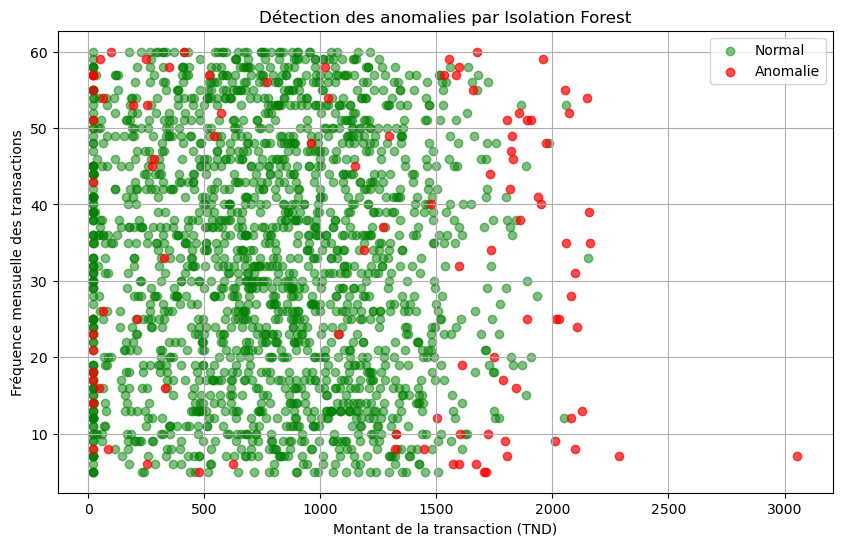

In [49]:
import matplotlib.pyplot as plt

# 🔹 Ajouter une colonne 'is_anomaly' pour plus de clarté (0 = normal, 1 = anomalie)
df['is_anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# 🔹 Créer un scatter plot
plt.figure(figsize=(10, 6))

# Transactions normales
plt.scatter(
    df[df['is_anomaly'] == 0]['montant'],
    df[df['is_anomaly'] == 0]['frequence'],
    c='green',
    label='Normal',
    alpha=0.5
)

# Transactions anormales
plt.scatter(
    df[df['is_anomaly'] == 1]['montant'],
    df[df['is_anomaly'] == 1]['frequence'],
    c='red',
    label='Anomalie',
    alpha=0.7
)

plt.title("Détection des anomalies par Isolation Forest")
plt.xlabel("Montant de la transaction (TND)")
plt.ylabel("Fréquence mensuelle des transactions")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
df.to_csv(r"C:\Users\MSI\Desktop\Attijari_bank\transactions_analyseees.csv", index=False)
